In [17]:
import numpy as np                                      # Opérations mathématiques 
import pandas as pd                                     # Traitement de données
import matplotlib                                    
import seaborn as sns                                   
import bokeh 
import plotly
import sys
import plotly.express as px                             # Visualisation de données

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder          # Encodage de variables catégorielles
from sklearn.model_selection import train_test_split     # Division de données en ensemble d'entraînement et de test
from sklearn.pipeline import Pipeline                   # Création de pipelines
from sklearn.impute import SimpleImputer                 # Imputation des valeurs manquantes
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder # Préparation des données
from sklearn.compose import ColumnTransformer            # Transformation des colonnes du dataframe

# Modélisation 
from sklearn.linear_model import LogisticRegression     # Modélisation
from sklearn.metrics import accuracy_score              # Évaluation de la performance du modèle
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, validation_curve, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("../data/data_features.csv", index_col = 0)

In [3]:
df.head()

,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure3pm,cloud9am,...,climat,geography,position,temp_amplitude,winddir9am_sin,winddir9am_cos,winddir3pm_sin,winddir3pm_cos,windgustdir_sin,windgustdir_cos
0,0.6,7.6,10.9,44.0,20.0,24.0,71.0,22.0,1007.1,8.0,...,0,0,0,9.5,1.224647e-16,-1.000000,0.382683,-0.923880,1.224647e-16,-1.000000
1,0.0,12.0,12.9,44.0,4.0,22.0,44.0,25.0,1007.8,1.0,...,0,0,0,17.7,9.238795e-01,-0.382683,-0.382683,-0.923880,3.826834e-01,-0.923880
2,0.0,8.0,8.0,46.0,19.0,26.0,38.0,30.0,1008.7,7.0,...,0,0,0,12.8,1.224647e-16,-1.000000,-0.382683,-0.923880,-3.826834e-01,-0.923880
3,0.0,10.0,2.2,24.0,11.0,9.0,45.0,16.0,1012.8,8.0,...,0,0,0,18.8,-7.071068e-01,0.707107,0.000000,1.000000,7.071068e-01,0.707107
4,1.0,4.8,6.7,41.0,7.0,20.0,82.0,33.0,1006.0,7.0,...,0,0,0,14.8,3.826834e-01,0.923880,0.707107,-0.707107,1.224647e-16,-1.000000


# Réalisation d'un model de régression logistique

In [5]:
X = df.drop(['raintomorrow'],axis=1)
y = df['raintomorrow']

In [11]:
import statsmodels.api as sm
lr = sm.OLS(y,X)
lr_fit = lr.fit()
p_values = lr_fit.summary2().tables[1]['P>|t|']
print(lr_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:           raintomorrow   R-squared (uncentered):                   0.392
Model:                            OLS   Adj. R-squared (uncentered):              0.392
Method:                 Least Squares   F-statistic:                              1802.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):                        0.00
Time:                        12:26:58   Log-Likelihood:                         -18440.
No. Observations:               72707   AIC:                                  3.693e+04
Df Residuals:                   72681   BIC:                                  3.717e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [19]:
print(p_values.sort_values(ascending =True))

sunshine            0.000000e+00
windgustspeed       0.000000e+00
year                0.000000e+00
humidity3pm         0.000000e+00
pressure3pm         0.000000e+00
windspeed3pm       4.046358e-173
temp_amplitude      3.583311e-75
cloud3pm            4.452835e-39
longitude           4.243568e-34
rainfall            3.061401e-31
climat              4.550000e-29
humidity9am         1.484649e-26
winddir3pm_sin      3.559850e-23
winddir9am_cos      5.978297e-15
winddir9am_sin      1.135008e-13
cloud9am            1.501636e-13
latitude            1.880149e-09
month               2.834402e-08
position            1.061157e-06
geography           1.061157e-06
raintoday           3.114124e-05
evaporation         3.366666e-04
windspeed9am        2.159013e-03
windgustdir_cos     3.833322e-03
windgustdir_sin     3.899732e-02
winddir3pm_cos      1.017655e-01
day                 2.301832e-01
Name: P>|t|, dtype: float64


In [13]:
X.corr()

,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure3pm,cloud9am,...,climat,geography,position,temp_amplitude,winddir9am_sin,winddir9am_cos,winddir3pm_sin,winddir3pm_cos,windgustdir_sin,windgustdir_cos
rainfall,1.000000,-0.195707,-0.217410,0.060922,0.049876,0.048914,0.262731,0.262519,0.011014,0.196467,...,0.051768,-0.039774,-0.039774,-0.282246,-0.022235,-0.137611,-0.059864,-0.076540,-0.051021,-0.100193
evaporation,-0.195707,1.000000,0.384583,0.279142,0.195290,0.191498,-0.533756,-0.365068,-0.405285,-0.159645,...,-0.116181,0.055147,0.055147,0.205603,-0.115099,0.190604,-0.075249,0.104412,-0.093038,0.153434
sunshine,-0.217410,0.384583,1.000000,0.024312,0.026415,0.076856,-0.418397,-0.519460,-0.076458,-0.600050,...,-0.064640,0.036246,0.036246,0.475898,-0.053277,0.156306,-0.018463,0.069851,-0.032653,0.116543
windgustspeed,0.060922,0.279142,0.024312,1.000000,0.536194,0.651294,-0.270435,-0.089723,-0.347767,0.030874,...,0.087439,-0.011004,-0.011004,-0.070015,0.096492,-0.031110,0.013046,-0.114440,-0.005303,-0.106044
windspeed9am,0.049876,0.195290,0.026415,0.536194,1.000000,0.422676,-0.276029,-0.044726,-0.097912,0.010819,...,0.016295,-0.050385,-0.050385,-0.207050,-0.019853,0.045599,-0.093966,0.038217,-0.064607,0.043230
windspeed3pm,0.048914,0.191498,0.076856,0.651294,0.422676,1.000000,-0.135945,0.055843,-0.220664,0.022295,...,-0.014782,-0.014188,-0.014188,-0.163309,0.023615,-0.081246,-0.009488,-0.041163,-0.009585,-0.060765
humidity9am,0.262731,-0.533756,-0.418397,-0.270435,-0.276029,-0.135945,1.000000,0.606431,0.231349,0.356886,...,0.094042,-0.108682,-0.108682,-0.340623,0.018455,-0.158461,0.027206,-0.047755,0.027757,-0.086387
humidity3pm,0.262519,-0.365068,-0.519460,-0.089723,-0.044726,0.055843,0.606431,1.000000,0.086799,0.408704,...,-0.004193,-0.057767,-0.057767,-0.709335,0.001564,-0.197250,-0.026110,0.083974,0.002714,-0.023552
pressure3pm,0.011014,-0.405285,-0.076458,-0.347767,-0.097912,-0.220664,0.231349,0.086799,1.000000,-0.034727,...,0.106888,-0.024827,-0.024827,-0.038420,-0.135761,-0.006838,-0.183738,0.121575,-0.140189,0.103124
cloud9am,0.196467,-0.159645,-0.600050,0.030874,0.010819,0.022295,0.356886,0.408704,-0.034727,1.000000,...,0.098882,-0.038514,-0.038514,-0.426148,-0.026364,-0.096588,-0.025240,-0.038592,-0.025869,-0.062826


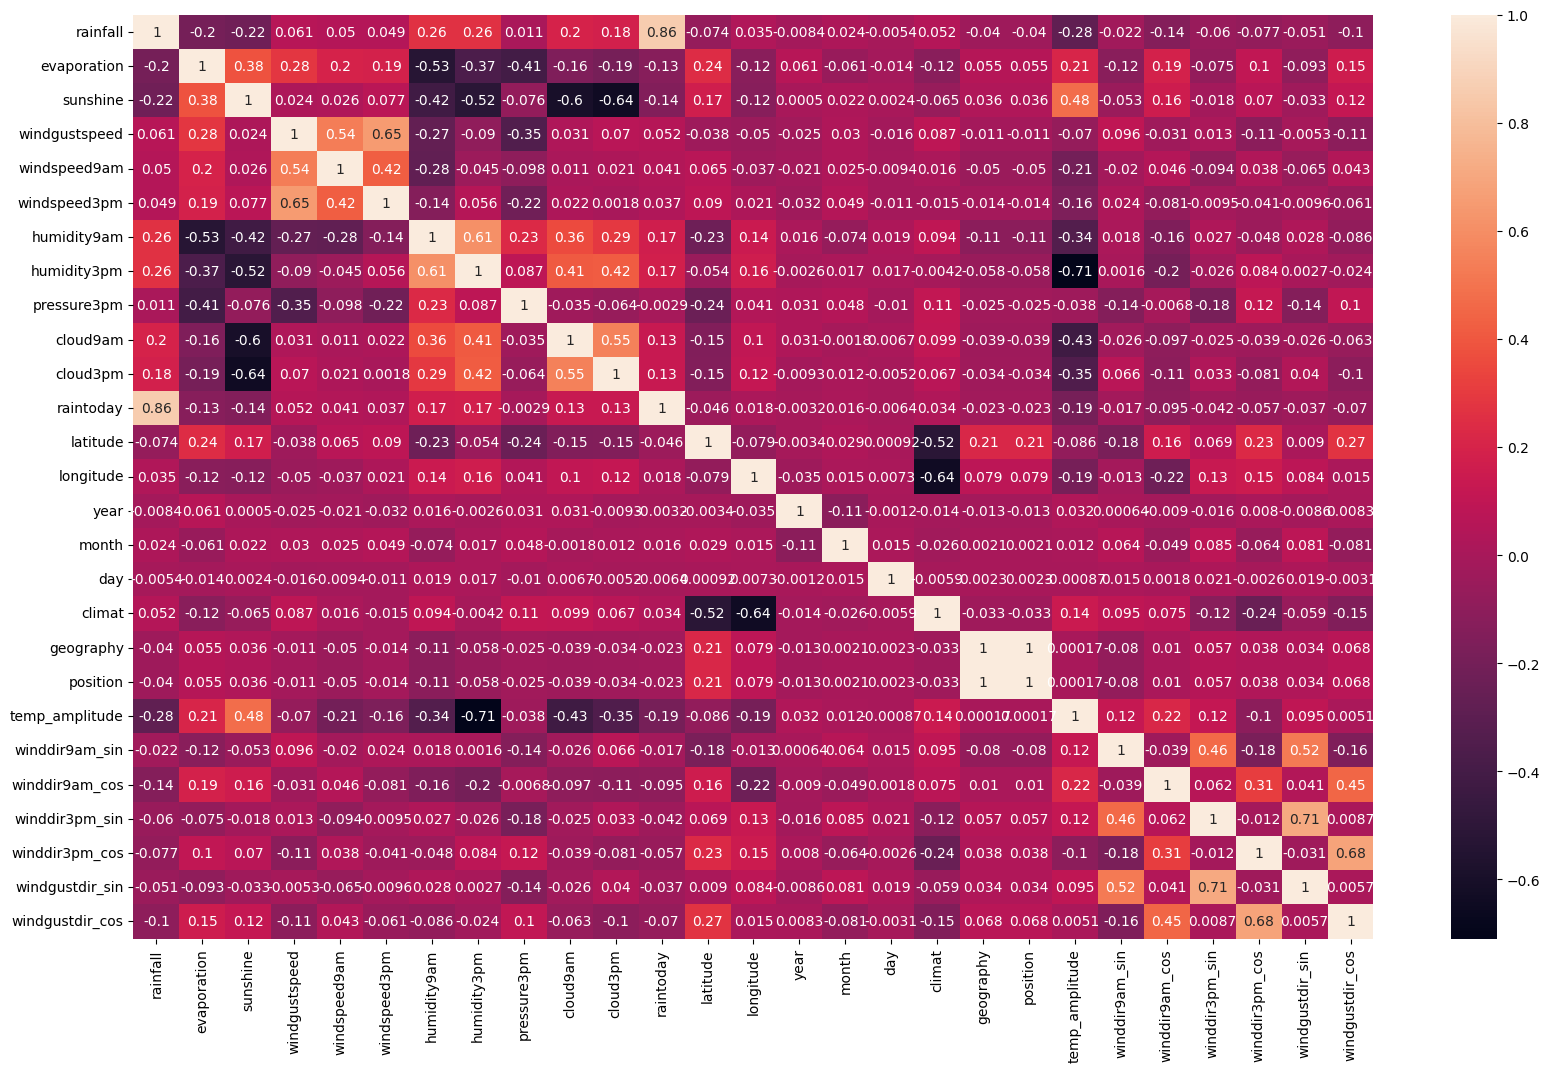

In [18]:
cor = X.corr(method='pearson', numeric_only=True)
plt.figure(figsize = (20,12))
sns.heatmap(cor, annot=True);

                 rainfall  evaporation  sunshine  windgustspeed  windspeed9am  \
rainfall         1.000000     0.195707  0.217410       0.060922      0.049876   
evaporation      0.195707     1.000000  0.384583       0.279142      0.195290   
sunshine         0.217410     0.384583  1.000000       0.024312      0.026415   
windgustspeed    0.060922     0.279142  0.024312       1.000000      0.536194   
windspeed9am     0.049876     0.195290  0.026415       0.536194      1.000000   
windspeed3pm     0.048914     0.191498  0.076856       0.651294      0.422676   
humidity9am      0.262731     0.533756  0.418397       0.270435      0.276029   
humidity3pm      0.262519     0.365068  0.519460       0.089723      0.044726   
pressure3pm      0.011014     0.405285  0.076458       0.347767      0.097912   
cloud9am         0.196467     0.159645  0.600050       0.030874      0.010819   
cloud3pm         0.184388     0.190495  0.638404       0.070367      0.021063   
raintoday        0.855009   